# Lab 2

**Andrew Mark Dale**

S/N: 100491442

AI in Enterprise Systems

Durham College

In [181]:
import numpy as np
import pandas as pd
import pickle

# For first model
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

## Importing data

This is a fairly different file, in a .data format. Since it is still comma delimited, we can import it in a similar manner to csv files. We just need to specify that the file does not contain a header.

In [182]:
wdbc_df = pd.read_csv("wdbc.data", header=None)

In [183]:
wdbc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Column headers

From the data.names file, we can see that most of the features lack a specific name.

The first two columns are the most important, "ID" and "Diagnosis". The former being one we can drop, as there is no information to be extracted from a unique identifier, and the latter being our target variable (Malignant and Benign).

It is worth noting that that some of the real-valued features (the other columns), include: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and the fractal dimension. But again, these aren't specifically named in the file, and there are 30 other features.

In [184]:
wdbc_df.rename(columns={0: "id",
                        1: "diagnosis"},
               inplace=True)

In [185]:
wdbc_df.head()

,id,diagnosis,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Splitting into train and test sets

x represents our features and y represents the target variable

In [186]:
x = wdbc_df.drop(columns=['id', 'diagnosis'])
y = wdbc_df['diagnosis']

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [188]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


## Building our model

Here I am making use of a stacking classifier ensemble model. The model is comprised of an AdaBoost classifier, KNN classifier (9 neighbours), Decision Tree, and the final estimator is a Random Forest Classifier with 150 estimators.

In [189]:
estimators = [("AdaBoost", AdaBoostClassifier()),
              ("KNN", KNeighborsClassifier(n_neighbors=9)),
              ("Decision Tree", DecisionTreeClassifier())]

In [190]:
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=150))

In [191]:
stacking_clf.fit(x_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()),
                               ('KNN', KNeighborsClassifier(n_neighbors=9)),
                               ('Decision Tree', DecisionTreeClassifier())],
                   final_estimator=RandomForestClassifier(n_estimators=150))

In [192]:
stacking_clf.score(x_test, y_test)

0.9736842105263158

In [193]:
y_pred = stacking_clf.predict(x_test)

### Confusion Matrix

As we can see from the above score and the confusion matrix, our model is quite accurate. Only two benign growths are labeled as malignant, and only one malignant cancer is labeled as benign.

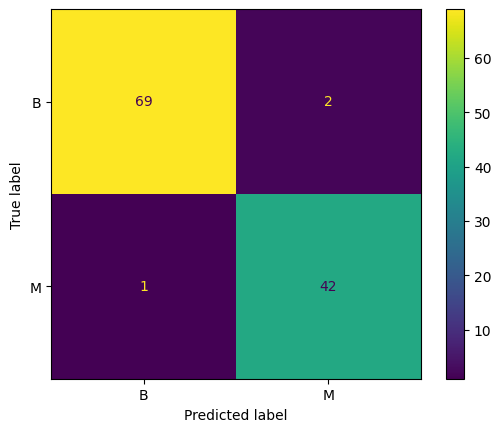

In [194]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

## Outputting our first model

The model is saved using pickle. It can be loaded using pickle once again and then used just like a normal sklearn model.

In [195]:
pickle.dump(stacking_clf, open("andrewmarkdale_model_v1.pkl", "wb"))

## Second Model

For this second model, I have decided to create a sequential CNN model to classify the growths.

In [383]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input, Dense

In [384]:
model = tf.keras.Sequential()

In [385]:
model.add(Input(shape=(30,)))
model.add(Dense(128))
model.add(Dense(68))
model.add(Dense(32))
model.add(Dense(1, activation="sigmoid"))

In [386]:
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [387]:
#y_train = y_train.apply(lambda v: 0 if v == 'B' else 1)
#y_test = y_test.apply(lambda v: 0 if v == 'B' else 1)
y_keras_train = y_train.apply(lambda v: 0 if v == 'B' else 1)
y_keras_test = y_test.apply(lambda v: 0 if v == 'B' else 1)

In [388]:
model.fit(x_train, y_keras_train, epochs=25, validation_split=.2)

Epoch 1/25
12/12 [==============================] - 1s 25ms/step - loss: 35.9571 - accuracy: 0.5549 - val_loss: 2.1285 - val_accuracy: 0.7253
Epoch 2/25
12/12 [==============================] - 0s 6ms/step - loss: 7.6950 - accuracy: 0.6813 - val_loss: 2.6183 - val_accuracy: 0.8681
Epoch 3/25
12/12 [==============================] - 0s 5ms/step - loss: 3.8777 - accuracy: 0.8049 - val_loss: 4.5640 - val_accuracy: 0.8791
Epoch 4/25
12/12 [==============================] - 0s 6ms/step - loss: 1.8226 - accuracy: 0.8791 - val_loss: 3.5355 - val_accuracy: 0.8901
Epoch 5/25
12/12 [==============================] - 0s 6ms/step - loss: 1.3087 - accuracy: 0.8709 - val_loss: 2.1199 - val_accuracy: 0.8791
Epoch 6/25
12/12 [==============================] - 0s 6ms/step - loss: 1.4889 - accuracy: 0.8956 - val_loss: 1.2430 - val_accuracy: 0.8791
Epoch 7/25
12/12 [==============================] - 0s 5ms/step - loss: 1.0834 - accuracy: 0.9093 - val_loss: 1.1286 - val_accuracy: 0.8681
Epoch 8/25
12/12 [

In [389]:
model.evaluate(x_test, y_keras_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.6052 - accuracy: 0.9211


[0.6052238345146179, 0.9210526347160339]

In [390]:
predicted_values = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


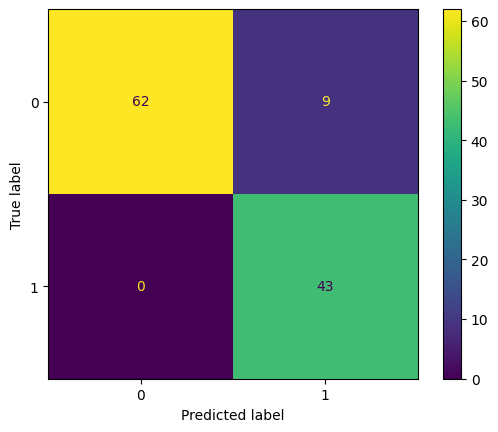

In [391]:
ConfusionMatrixDisplay.from_predictions(y_keras_test, predicted_values.reshape(1, -1).round().tolist()[0]);

In [392]:
pickle.dump(model, open("andrewmarkdale_model_v2.pkl", "wb"))